In [89]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import patch_sklearn #importing intel sklearn
patch_sklearn()
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
!pwd

/content


In [9]:
%cd '/content/drive/MyDrive/data'

/content/drive/MyDrive/data


In [133]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv', delimiter=",")
df = pd.read_excel('Chi.xlsx')
dataset=dataset.sample(frac=1)

In [100]:
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
94,58.0,0,144,1,38,1,327000.0,0.7,142,0,0,83,0
147,64.0,0,1610,0,60,0,242000.0,1.0,137,1,0,113,0
26,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
150,72.0,0,233,0,45,1,235000.0,2.5,135,0,0,115,1
142,50.0,0,482,1,30,0,329000.0,0.9,132,0,0,109,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
82,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
156,52.0,1,58,0,35,0,277000.0,1.4,136,0,0,120,0
145,50.0,0,185,0,30,0,266000.0,0.7,141,1,1,112,0


In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 94 to 290
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 32.7 KB


In [102]:
dataset_X = np.array(dataset['age']).reshape(-1, 1)
dataset_Y = np.array(dataset['DEATH_EVENT']).reshape(-1, 1)


In [103]:
#Pearson Corellation Method

corr_matrix = dataset.corr(method='pearson')

print("Pearson correlation coefficient:", corr_matrix)


Pearson correlation coefficient:                                age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH

In [110]:
print(df.info)

<bound method DataFrame.info of     Unnamed: 0       Age  Anaemia  Creatinine_phosphokinase  Diabetes  \
0  Death_Event  0.253729  0.06627                  0.062728 -0.001943   

   Ejection_Fracion  High_Blood_Pressure  Plateletes  Serum_Creatinine  \
0         -0.268603             0.079351   -0.049139          0.294278   

   Serum_Sodium       Sex   Smoking      Time  
0     -0.195204 -0.004316 -0.012623 -0.526964  >


In [127]:
df 

,Unnamed: 0,Age,Anaemia,Creatinine_phosphokinase,Diabetes,Ejection_Fracion,High_Blood_Pressure,Plateletes,Serum_Creatinine,Serum_Sodium,Sex,Smoking,Time,Death_Event
0,Death_Event,0.253729,0.06627,0.062728,-0.001943,-0.268603,0.079351,-0.049139,0.294278,-0.195204,-0.004316,-0.012623,-0.526964,1


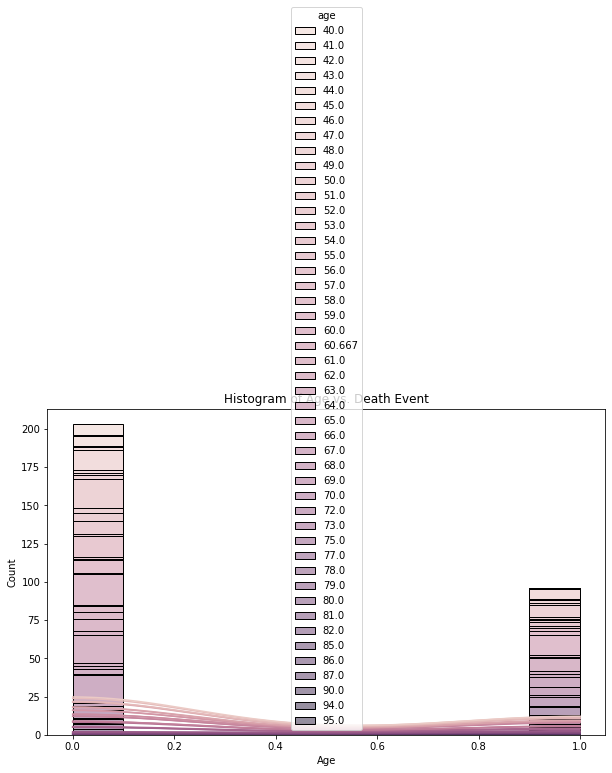

In [104]:
dataset.columns = dataset.columns.str.strip()
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='DEATH_EVENT', hue='age', kde=True, multiple='stack')
plt.title('Histogram of Age vs. Death Event')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [46]:
#Chi squared value for anemia vs DEATH EVENT
contingency_table = pd.crosstab(dataset['anaemia'], dataset['DEATH_EVENT'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-squared value anemia vs DEATH EVENT: ", chi2)
print("P-value: ", p_value)

Chi-squared value anemia vs DEATH EVENT:  1.042175485287005
P-value:  0.3073160508415107


In [45]:
#Chi squared value for creatinine_phosphokinase vs DEATH EVENT
contingency_table = pd.crosstab(dataset['creatinine_phosphokinase'], dataset['DEATH_EVENT'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-squared value creatinine_phosphokinase vs DEATH EVENT: ", chi2)
print("P-value: ", p_value)

Chi-squared value creatinine_phosphokinase vs DEATH EVENT:  209.8449024640732
P-value:  0.43175059718299313


In [44]:
#Chi squared value for diabetes vs DEATH EVENT
contingency_table = pd.crosstab(dataset['creatinine_phosphokinase'], dataset['DEATH_EVENT'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-squared value diabetes vs DEATH EVENT: ", chi2)
print("P-value: ", p_value)

Chi-squared value diabetes vs DEATH EVENT:  209.8449024640732
P-value:  0.43175059718299313


In [43]:
#Chi squared value for ejection_fraction vs DEATH EVENT
contingency_table = pd.crosstab(dataset['ejection_fraction'], dataset['DEATH_EVENT'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-squared value ejection_fraction vs DEATH EVENT: ", chi2)
print("P-value: ", p_value)

Chi-squared value ejection_fraction vs DEATH EVENT:  65.33158131636927
P-value:  6.459327810543188e-08


In [42]:
#Chi squared value for high_blood_pressure vs DEATH EVENT
contingency_table = pd.crosstab(dataset['high_blood_pressure'], dataset['DEATH_EVENT'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-squared value high_blood_pressure vs DEATH EVENT: ", chi2)
print("P-value: ", p_value)

Chi-squared value high_blood_pressure vs DEATH EVENT:  1.5434607612967581
P-value:  0.21410341199416902


In [41]:
#Chi squared value for platelets vs DEATH EVENT
contingency_table = pd.crosstab(dataset['platelets'], dataset['DEATH_EVENT'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-squared value platelets vs DEATH EVENT: ", chi2)
print("P-value: ", p_value)

Chi-squared value platelets vs DEATH EVENT:  172.07945060207993
P-value:  0.5482703513757745


In [40]:
#Chi squared value for serum_creatinine vs DEATH EVENT
contingency_table = pd.crosstab(dataset['serum_creatinine'], dataset['DEATH_EVENT'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-squared value serum_creatinine vs DEATH EVENT: ", chi2)
print("P-value: ", p_value)

Chi-squared value serum_creatinine vs DEATH EVENT:  92.42848935302217
P-value:  3.1452364264229703e-06


In [38]:
#Chi squared value for serum_sodium vs DEATH EVENT
contingency_table = pd.crosstab(dataset['serum_sodium'], dataset['DEATH_EVENT'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-squared value serum_sodium vs DEATH EVENT: ", chi2)
print("P-value: ", p_value)

Chi-squared value serum_sodium vs DEATH EVENT:  45.80089931117036
P-value:  0.009600557349298953


In [39]:
#Chi squared value for sex vs DEATH EVENT
contingency_table = pd.crosstab(dataset['sex'], dataset['DEATH_EVENT'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-squared value sex vs DEATH EVENT: ", chi2)
print("P-value: ", p_value)

Chi-squared value sex vs DEATH EVENT:  0.0
P-value:  1.0


In [50]:
#Chi squared value for smoking vs DEATH EVENT
contingency_table = pd.crosstab(dataset['smoking'], dataset['DEATH_EVENT'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-squared value smoking vs DEATH EVENT: ", chi2)
print("P-value: ", p_value)

Chi-squared value smoking vs DEATH EVENT:  0.007331473567119502
P-value:  0.9317652998235507


In [51]:
#Chi squared value for time vs DEATH EVENT
contingency_table = pd.crosstab(dataset['time'], dataset['DEATH_EVENT'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-squared value time vs DEATH EVENT: ", chi2)
print("P-value: ", p_value)

Chi-squared value time vs DEATH EVENT:  245.3263700738916
P-value:  6.590460363385011e-07


**Anaemia:** Chi-squared value = 1.042, p-value = 0.307

**Creatinine phosphokinase:** Chi-squared value = 209.845, p-value = 0.432

**Diabetes:** Chi-squared value = 209.845, p-value = 0.432

**Ejection fraction:** Chi-squared value = 65.332, p-value = 6.459e-08

**High blood pressure:** Chi-squared value = 1.543, p-value = 0.2144

**Platelets:** Chi-squared value = 172.079, p-value = 0.548

**Serum creatinine:** Chi-squared value = 92.428, p-value = 3.145e-06

**Serum sodium:** Chi-squared value = 45.801, p-value = 0.010

**Sex:** Chi-squared value = 0.000, p-value = 1.000

**Smoking:** Chi-squared value = 0.007, p-value = 0.932

**Time:** Chi-squared value = 245.326, p-value = 6.590e-07

These results suggest that there is a statistically significant relationship between the **'DEATH_EVENT'** variable and the **'ejection_fraction'**, **'serum_creatinine'**, **'serum_sodium'**, and **'time'** variables, as their p-values are less than 0.05. 

The other variables do not appear to have a statistically significant relationship with 'DEATH_EVENT', as their p-values are greater than 0.05.







In [97]:
print(dataset.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')


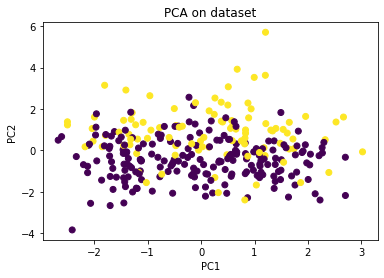

In [105]:
#Principal Component Analysis
target = dataset['DEATH_EVENT']
dataset = dataset.drop(columns=['DEATH_EVENT'])

#Seperate the traget 'DEATH_EVENT'
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dataset)
pca = PCA(n_components=2)

X_reduced = pca.fit_transform(df_scaled)

#Plotting the results
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA on dataset')
plt.show()

In [136]:
dataset_X_train = dataset_X[:-30]
dataset_Y_train = dataset_Y[:-30]
dataset_X_test = dataset_X[-30:]
dataset_Y_test = dataset_Y[-30:]

In [140]:
model = LinearRegression()
model.fit(dataset_X_train, dataset_Y_train)


LinearRegression()

In [141]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [[0.0101197]]
Intercept: [-0.29532357]


In [142]:
dataset_Y_predict=model.predict(dataset_X_test)

In [143]:
print("Mean squared error: ",mean_squared_error(dataset_Y_predict,dataset_Y_test))


Mean squared error:  0.19589973085874776


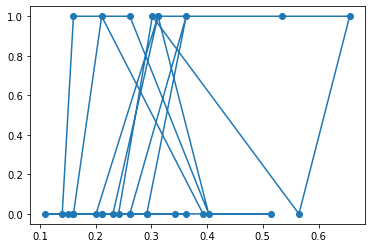

In [147]:
plt.scatter(dataset_Y_predict,dataset_Y_test)
plt.plot(dataset_Y_predict,dataset_Y_test)
plt.show()